In [75]:
import networkx as nx
import osmnx as ox
import pandas as pd 
import numpy as np
import math
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats


In [50]:
fill_df = pd.read_csv('fill_df')
fill_df


osmid  speed_mph_mean           u           v  key  oneway  lanes  \
0         3996189      100.748833    23001195   359852835    0    True      3   
1         3996189      100.748833    23001220    23001195    0    True      3   
2         3996189      100.748833    23001944    23001220    0    True      3   
3         3996189      100.748833    23001985    23001944    0    True      3   
4         3996189      100.748833    23002236    23001985    0    True      3   
...           ...             ...         ...         ...  ...     ...    ...   
115985  699181046       40.089789  7549586452   260447590    0   False      1   
115986  699286587       29.414750   201680822  6549083955    0   False      1   
115987  699286587       29.414750  6549083955   201680822    0   False      1   
115988  699385225       27.389875    26066630    26066631    0   False      4   
115989  699385225       27.389875    26066631    26066630    0   False      4   

                                name   highway  maxspeed   length   ref  \
0                               M-40  motorway       100   96.057  M-40   
1                               M-40  motorway       100  122.353  M-40   
2                               M-40  motorway       100  117.894  M-40   
3                               M-40  motorway       100   80.879  M-40   
4                               M-40  motorway       100   88.793  M-40   
...                              ...       ...       ...      ...   ...   
115985  Calle Arquitecto López Otero  tertiary        50    7.273   NaN   
115986       Avenida de la Osa Mayor  tertiary        50   17.225   NaN   
115987       Avenida de la Osa Mayor  tertiary        50   17.225   NaN   
115988                      Gran Vía  tertiary        30   31.299   NaN   
115989                      Gran Vía  tertiary        30   31.299   NaN   

       junction bridge access tunnel  est_width  landuse  width  \
0           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
1           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
2           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
3           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
4           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
...         ...    ...    ...    ...        ...      ...    ...   
115985      NaN    NaN    NaN    NaN        NaN      NaN    NaN   
115986      NaN    NaN    NaN    NaN        NaN      NaN    NaN   
115987      NaN    NaN    NaN    NaN        NaN      NaN    NaN   
115988      NaN    NaN    NaN    NaN        NaN      NaN    NaN   
115989      NaN    NaN    NaN    NaN        NaN      NaN    NaN   

                                                 geometry  
0       LINESTRING (-3.7381223 40.3618151, -3.7369952 ...  
1       LINESTRING (-3.7395663 40.3618038, -3.7381223 ...  
2       LINESTRING (-3.7409568 40.3618431, -3.7395663 ...  
3       LINESTRING (-3.7419095 40.3618888, -3.7409568 ...  
4       LINESTRING (-3.7429572 40.3619073, -3.7419095 ...  
...                                                   ...  
115985  LINESTRING (-3.7307745 40.4431496, -3.7308514 ...  
115986  LINESTRING (-3.7791253 40.4595704, -3.7789423 ...  
115987  LINESTRING (-3.7789423 40.4596383, -3.7791253 ...  
115988  LINESTRING (-3.7068988 40.4208795, -3.707185 4...  
115989  LINESTRING (-3.707185 40.4210577, -3.7068988 4...  

[115990 rows x 20 columns]

In [60]:
maxspeed_list = []
for i in fill_df['maxspeed']:
    print(i)
    maxspeed_list.append(i)

100
100
100
100
100
100
50
50
50
70
70
70
70
70
70
70
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
90
90
90
90
90
90
90
90
50
50
50
50
50
50
50
50
80
80
50
50
80
80
80
80
80
80
80
80
80
7

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
70
70
70
50
50
50
90
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
100
100
100
40
40
100
80
80
100
50
100
100
100
40
40
40
40
40
80
80
100
100
100
100
100
100
90
90
90
90
40
40
70
70
100
100
100
80
80
80
100
100
100
60
60
60
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
100
100
100
100
100
100
100
100
100
100
100
100
100
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
80
80
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

50
50
50
50
50
50
50
50
50
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
100
100
100
40
40
40
40
70
70
70
70
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
20
20
20
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
20
20
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
90
90
90
90
90
90
50
50
50
50
50
5

50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
20
20
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
80
80
80
20
20
20
50
50
50
50
20
20
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
20
20
20
20
20
20
30
30
30
30
30
30
3

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
100
100
100
100
100
100
100
50
50
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
90
90
90
90
90
90
90
60
60
60
90
90
90
90
90
90
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
50
50
50
50
50
50
40
100
100
100
100
100
100
100
100
100
100
100
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
100
100
100
100
100
50
50
50
50
50
50
50
50


100
100
100
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
5

50
50
50
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
80
80
80
80
80
80
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
40
40
40
40
40
40
70
70
70
70
70
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
40
50
50
50
50
70
70
70
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
70
70
70
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
50
50
50
50
50
50
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
5

40
40
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
80
80
80
80
80
80
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
100
100
100
100
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


50
50
50
50
50
50
50
50
50
50
50
50
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
100
100
100
100
100
100
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

70
70
70
70
70
70
70
70
70
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50

100
100
100
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
100
100
100
100
40
40
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
40
40
40
70
70
70
70
70
70
50
50
50
50
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
80
80
80
80
80
80
80
80
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
40
40
100
100
100
100
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
80
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
80
50
50
50
50
50
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


40
40
40
40
50
50
50
50
40
40
100
100
100
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
50
50
50
50
50
50
50
50
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40

40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
50
50
50
50
50
50
50
40
100
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
100
100
100
100
100
100
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
70
70
70
70
50
50
50
50
50


50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
50
50
50
50
50
50
50
50
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
100
100
100
100
100
100
100
100
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
120
120
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
60
60
60
60
60
60
60
60
60
50
50
50
50
50
50
50
50
50
50
50


40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
90
90
90
90
90
90
90
90
50
50
90
90
90
50
90
90
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
90
90
40
90
90
90
90
90
90
90
90
90
90
90
90
50
50
50
50
50
50
90
90
90
40
40
40
90
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
80
80
80
80
80
80
80
80
100
100
100
70
70
80
80
40
40
100
100
100
100
100
40
40
40
40
40
40
40
40
40
70
70
70
60
60
60
60
60
80
50
50
100
100
100
100
100
100
100
50
50
50
50
50
50
5

90
90
90
90
90
90
90
90
40
40
40
40
40
40
40
90
40
90
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
70
70
70
70
70
40
80
80
80
80
80
80
80
80
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
50
50
50
50
50
50
50
50
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
60
60
60
60
60
60
70
40
100
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
80
80
80
80
80
80
120
120
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
20
20
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
70
70
60
60
60
60
60
60
60
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
100
100
100
100
100
100
100
100
100
100
100
100
40
40
40
40
40
40
40
40
40
40
40
40
40
100
80
80
80
80
100
50
50
50
50
50
50
50
50
50
50
50
100
100
100
100
100
100
100
100
100
100
100
100
100
1

40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
90
50
50
50
80
80
80
50
50
50
50
30
30
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
40
90
90
90
90
50
50
90
90
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
90
90
90
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
20
20
20
20
20
20
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
3

50
50
50
50
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
5

50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
30
30
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
50
50
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

50
50
30
30
50
50
50
50
40
70
70
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
90
90
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
90
90
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
50
50
50
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
20
20
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
50
50
50
50
50
50
50
50
80
80
60
60
60
60
60
60
60
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
5

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
80
80
80
80
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
30
30
30
30
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
90
90
90
90
90
90
50
50
50
50
50
50
60
60
60
60
70
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
90
90
40
40
40
50
50
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
100
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40


In [61]:
meanspeed_list = []
for i in fill_df['speed_mph_mean']:
    print(i)
    meanspeed_list.append(i)

100.74883333333332
100.74883333333332
100.74883333333332
100.74883333333332
100.74883333333332
100.74883333333332
38.55220833333335
38.55220833333335
38.55220833333335
46.3866875
46.3866875
46.3866875
46.3866875
46.3866875
46.3866875
46.3866875
33.376583333333336
43.64852083333332
43.64852083333332
43.64852083333332
43.64852083333332
43.64852083333332
43.64852083333332
43.64852083333332
43.64852083333332
43.64852083333332
43.64852083333332
37.45254166666667
37.45254166666667
14.1088
14.1088
14.1088
14.1088
14.1088
14.1088
14.1088
14.1088
14.621769230769225
14.621769230769225
14.621769230769225
14.621769230769225
14.621769230769225
14.621769230769225
14.621769230769225
14.621769230769225
14.621769230769225
14.621769230769225
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024
27.508188034188024


22.64908333333333
20.354746666666667
20.354746666666667
20.354746666666667
20.354746666666667
20.354746666666667
20.354746666666667
20.354746666666667
18.08515789473684
18.08515789473684
18.08515789473684
22.6095
22.6095
39.64876388888889
39.64876388888889
39.64876388888889
39.64876388888889
39.64876388888889
35.96041666666667
35.96041666666667
41.25291666666667
34.07820833333333
34.07820833333333
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
17.579509259259265
15.307714285714285
15.307714285714285
15.307714285714285
30.59924999999999
30.59924999999999
30.59924999999999
30.59924999999999
30.59924999999999
30.896553191489357
30.896553191489357
40.39643750000001
40.39643750000001
40.39643750000001
40.39643750000001
38.031875
38.031875
38.031875
38.031875
38.031875
38.031875
25.8217916666666

31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
31.214192546583856
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
30.703615384615393
44.02758333333333
44.02758333333333
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5548407079646
46.5

16.680541666666667
24.26519047619048
24.26519047619048
24.26519047619048
24.26519047619048
15.339541666666667
15.339541666666667
15.339541666666667
15.339541666666667
18.39283333333333
18.39283333333333
18.39283333333333
76.34495833333331
76.34495833333331
76.34495833333331
83.69304166666667
83.69304166666667
83.69304166666667
83.69304166666667
83.69304166666667
83.69304166666667
83.69304166666667
81.81004166666669
81.81004166666669
81.81004166666669
81.81004166666669
81.81004166666669
81.81004166666669
71.46245833333333
71.46245833333333
71.46245833333333
97.20345833333334
96.53891666666664
96.53891666666664
96.53891666666664
64.42283333333332
64.42283333333332
64.42283333333332
64.42283333333332
35.303145833333346
35.303145833333346
35.303145833333346
35.303145833333346
35.303145833333346
23.965166666666665
23.965166666666665
32.21620833333333
32.21620833333333
32.21620833333333
32.21620833333333
32.21620833333333
32.21620833333333
32.21620833333333
32.868500000000004
32.868500000000

19.96164583333333
20.920166666666674
20.40725
20.40725
20.40725
20.40725
20.40725
14.973416666666667
14.973416666666667
16.116142857142858
16.116142857142858
16.116142857142858
16.116142857142858
16.116142857142858
16.116142857142858
16.116142857142858
16.116142857142858
16.116142857142858
16.116142857142858
18.60323076923077
18.60323076923077
18.60323076923077
18.60323076923077
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
24.8195
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.250865546218485
21.1235
21.1235
21.1235
11.713166666666664
11.713166666666664
11.713166666666664
19.754
19.754
19.754
19.754
19.754
19.754
18.67544
18.67544
18.67544
18.67544
18.67544
18.67544
20.436875
20.436875


30.7318125
30.7318125
42.07587878787879
42.07587878787879
42.07587878787879
42.07587878787879
42.07587878787879
42.07587878787879
27.16713636363637
27.16713636363637
27.16713636363637
27.16713636363637
27.16713636363637
9.8849
9.8849
16.826
16.826
16.826
16.826
19.88315
19.88315
19.88315
19.88315
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
27.291486111111112
47.88727272727274
47.88727272727274
39.15354545454546
39.15354545454546
12.793625
12.793625
12.793625
12.793625
12.793625
12.793625
12.793625
12.793625
31.573025641025637
31.573025641025637
31.573025641025637
31.573025641025637
31.573025641025637
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472
27.679731481481472

23.969538461538463
23.969538461538463
23.969538461538463
23.969538461538463
23.969538461538463
23.969538461538463
23.969538461538463
23.969538461538463
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
21.206833333333336
13.963642857142856
13.963642857142856
13.963642857142856
49.353298611111114
49.353298611111114
49.353298611111114
49.353298611111114
49.353298611111114
49.353298611111114
49.353298611111114
49.353298611111114
49.353298611111114
36.82683333333333
36.82683333333333
33.3035
33.3035
29.66736363636365
66.09633333333335
66.09633333333335
66.09633333333335
66.09633333333335
66.09633333333335
66.09633333333335
66.09633333333335
21.861615384615387
21.861615384615387
21.861615384615387
21.861615384615387
21.861615384615387
21.861615384615387
21.316854166666666
21.316854166666666
21.316854166666666
21.316

27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
27.91307692307693
20.900625
20.900625
20.900625
20.900625
20.900625
20.900625
20.900625
20.900625
20.900625
20.900625
20.900625
20.900625
25.915
25.915
25.915
21.92144444444445
21.92144444444445
21.92144444444445
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39.914584905660384
39

21.553555555555555
21.553555555555555
21.553555555555555
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
33.910476190476196
22.908857142857148
22.908857142857148
22.908857142857148
22.908857142857148
22.908857142857148
26.57350000000001
28.77693750000001
30.93038888888889
24.107052631578945
24.107052631578945
24.107052631578945
24.107052631578945
24.107052631578945
24.107052631578945
30.17687500000001
30.17687500000001
30.17687500000001
30.17687500000001
34.799
34.799
34.799
34.799
25.645
25.645
25.645
25.645
33.14857142857143
33.14857142857143
33.14857142857143
33.14857142857143
33.14857142857143
33.14857142857143
33.14857142857143
33.14857

28.404
19.016
30.50076190476189
30.50076190476189
29.36783333333333
29.36783333333333
29.36783333333333
29.36783333333333
29.36783333333333
30.23441666666667
39.7175
39.7175
39.7175
39.7175
39.7175
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
45.5399090909091
35.29792857142858
35.29792857142858
35.29792857142858
27.05215384615385
27.05215384615385
27.05215384615385
27.05215384615385
27.05215384615385
20.272000000000002
20.272000000000002
20.27200

31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
31.56512800000001
30.304166666666656
39.53155208333333
39.53155208333333
39.53155208333333
39.53155208333333
39.53155208333333
39.531552

28.414977272727274
29.546499999999995
29.546499999999995
29.546499999999995
29.546499999999995
29.546499999999995
29.546499999999995
29.546499999999995
29.546499999999995
29.546499999999995
29.546499999999995
18.20425
18.20425
18.20425
18.20425
18.20425
18.20425
18.20425
22.5515
22.5515
22.5515
22.5515
22.5515
40.31515789473683
40.31515789473683
40.31515789473683
40.31515789473683
40.31515789473683
40.31515789473683
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
9.391157894736839
21.082333333333327
21.082333333333327
19.3675
19.3675
19.3675
19.3675
19.3675
19.3675
19.3675
19.3675
19.3675
19.3675
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283
31.042526829268283


28.56077419354839
28.56077419354839
28.56077419354839
72.93566666666669
72.93566666666669
72.93566666666669
72.78970833333331
72.78970833333331
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
35.36905882352941
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
31.759214285714286
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.568
27.56

38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
38.59932780082988
42.9242
42.9242
42.9242
42.9242
42.9242
28.97036363636364
28.97036363636364
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.52775135135138
36.527

26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
26.15048333333333
47.459777777777774
47.459777777777774
50.611875
50.611875
50.611875
50.611875
39.7719375
39.7719375
39.5504375
39.5504375
39.5504375
39.5504375
39.5504375
39.5504375
39.5504375
39.5504375
39.5504375
39.5504375
39.5504375
39.5504375
52.25779166666667
52.25779166666667
52.25779166666667
52.25779166666667
52.25779166666667
52.25779166666667
21.23804166666666
98.38291666666665
98.38291666666665
98.38291666666665
98.38291666666665
41.32095999999999
41.32095999999999
41.32095999999999
41.32095999999999
41.32095999999999
54.29309523809522
54.29309523809522
54.29309523809522
54.29309523809522
45.85865217391304
45.85865217391304
45.85865217391304
45.85865217391304
39.1781875
39.1781875
39.1781875
39.1781875
59.5

60.56166666666667
60.56166666666667
60.56166666666667
60.56166666666667
61.802
61.802
53.38620000000001
53.38620000000001
53.38620000000001
53.38620000000001
26.098625
26.098625
30.002684210526308
30.002684210526308
37.36575
37.36575
48.88725
48.88725
37.16741666666668
37.16741666666668
36.33999999999999
36.33999999999999
34.98273913043479
34.98273913043479
47.02771428571428
47.02771428571428
47.02771428571428
47.02771428571428
47.02771428571428
21.763238095238094
21.763238095238094
31.67275
31.67275
41.547666666666665
41.547666666666665
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
39.1428
26.051625
26.051625
43.46567499999997
43.46567499999997
43.46567499999997
43.46567499999997
43.46567499999997
43.46567499999997
43.46567499999997
43.46567499999997
43.46567499999997
43.46567499999997
34.323
34.323
39.6605
39.6605
33.534611111111104
33.534611111111104
46.49555555555553
46.49555555555553
22.783705882352944
22.7837058823

100.58987500000002
100.58987500000002
100.58987500000002
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
77.589
9.891541666666667
9.891541666666667
9.891541666666667
9.891541666666667
9.891541666666667
12.51233333333333
12.51233333333333
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
43.7
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
31.33927329192547
28.58395833333333
28.58395833333333
28.58395833333333
28.58395833333333
25.30725
25.30725
25.30725
25.30725
25.30725
25.30725
25.30725
29.076545454545457
29.076545454545457
29.076545454545457
29.076545454545457
29.076545454545457
29

62.53573333333334
62.53573333333334
62.53573333333334
64.4132
64.4132
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
30.910611111111113
50.10979166666666
50.10979166666666
50.10979166666666
34.629124999999995
34.629124999999995
34.629124999999995
77.11891666666666
77.11891666666666
77.11891666666666
77.11891666666666
77.11891666666666
77.11891666666666
77.11891666666666
77.11891666666666
79.6906818181818
79.6906818181818
79.6906818181818
79.6906818181818

29.35133333333333
29.35133333333333
33.775447916666664
33.775447916666664
33.775447916666664
33.775447916666664
33.775447916666664
33.775447916666664
33.775447916666664
33.775447916666664
33.775447916666664
33.775447916666664
33.775447916666664
69.144875
76.12366666666667
76.12366666666667
76.12366666666667
76.12366666666667
73.56720833333334
73.56720833333334
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
31.27076923076924
93.26725
99.98775000000002
99.98775000000002
99.98775000000002
85.0226666666667
85.0226666666667
94.65379166666668
94.65379166666668


36.633812500000026
36.633812500000026
33.9144583333333
33.9144583333333
33.9144583333333
33.9144583333333
33.9144583333333
33.9144583333333
33.9144583333333
33.9144583333333
33.9144583333333
33.9144583333333
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
29.410869791666666
36.24533333333334
36.24533333333334
36.24533333333334
36.24533333333334
36.24533333333334
36.24533333333334
31.506374999999995
31.506374999999995
31.506374999999995
31.506374999999995
33.446470588235286
33.446470588235286
36.336687500000025
36.336687500000025
36.336687500000025
36.336687500000025
36.336687500000025
29.628374999999995
29.628374999999995
45.19999999999999
4

30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.65772916666667
30.6577291

44.90221739130434
44.90221739130434
44.90221739130434
43.88825
43.88825
43.88825
43.88825
43.88825
40.43927659574468
40.43927659574468
40.43927659574468
40.43927659574468
40.43927659574468
40.43927659574468
32.692722222222216
32.692722222222216
32.692722222222216
43.38369696969696
43.38369696969696
43.38369696969696
43.38369696969696
43.38369696969696
43.38369696969696
43.38369696969696
43.38369696969696
43.38369696969696
43.38369696969696
43.38369696969696
39.35188888888889
39.35188888888889
39.35188888888889
39.35188888888889
39.35188888888889
39.35188888888889
39.35188888888889
39.35188888888889
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
48.687931818181816
44.64552380952

36.99095833333333
36.99095833333333
36.99095833333333
36.99095833333333
47.96770833333333
47.96770833333333
26.12291666666665
20.69
20.69
20.69
20.69
20.69
20.69
20.69
20.69
34.5948125
34.5948125
31.84496666666665
31.84496666666665
31.84496666666665
31.84496666666665
31.84496666666665
34.286173913043484
34.286173913043484
39.84966666666666
39.84966666666666
39.84966666666666
38.56313636363635
28.664375
28.664375
28.664375
28.664375
39.1725
39.1725
39.1725
39.1725
36.56175
28.30833333333334
28.30833333333334
28.30833333333334
28.30833333333334
28.30833333333334
28.30833333333334
28.30833333333334
28.30833333333334
44.40820833333334
44.40820833333334
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
37.84662162162163
38.965625
38.965625
27.26125000000000

74.02749999999997
28.657714285714285
28.657714285714285
29.69466666666667
29.69466666666667
29.69466666666667
29.69466666666667
29.69466666666667
29.69466666666667
29.69466666666667
29.69466666666667
19.26065909090909
19.26065909090909
19.26065909090909
42.70425
42.70425
42.70425
42.70425
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
26.75420833333333
14.810083333333333
14.810083333333333
14.810083333333333
14.810083333333333
14.810083333333333
14.810083333333333
14.810083333333333
22.66095833333333
22.66095833333333
24.643966666666664
24.643966666666664
24.643966666666664
24.643966666666664
24.643966666666664
24.643966666666664
24.643966666666664
24.643966666666664
30.620000000000005
30.620000000000005
30.620000000000005
30.620000000000005
30.620000000000005
30.620000000000005
30.620000000000005
30.620000000000005
30.620000000000005
30

35.21763291139241
35.21763291139241
35.21763291139241
44.179125
31.015950000000004
50.512062500000006
50.512062500000006
50.512062500000006
50.512062500000006
36.17919444444443
36.17919444444443
36.17919444444443
36.17919444444443
36.17919444444443
36.17919444444443
41.771447916666666
41.771447916666666
41.771447916666666
41.771447916666666
41.771447916666666
41.771447916666666
34.0651875
34.0651875
25.3752
25.3752
40.75425
40.75425
40.75425
29.195894736842106
29.195894736842106
29.195894736842106
29.195894736842106
29.195894736842106
29.195894736842106
29.195894736842106
24.94241666666667
24.94241666666667
24.94241666666667
24.94241666666667
24.94241666666667
24.94241666666667
24.94241666666667
29.60400000000001
29.60400000000001
17.582000000000004
34.60305555555555
34.60305555555555
34.60305555555555
18.821157894736842
18.821157894736842
30.33433333333333
30.33433333333333
41.755875
41.755875
41.755875
41.755875
41.755875
12.552999999999999
12.552999999999999
12.552999999999999
40.09

89.7025
89.7025
89.7025
89.7025
67.13129166666668
67.13129166666668
67.13129166666668
67.13129166666668
67.13129166666668
67.13129166666668
67.13129166666668
88.95358333333333
88.95358333333333
85.80191666666667
61.87787500000002
61.87787500000002
93.24958333333336
93.24958333333336
104.6125
104.6125
104.6125
104.6125
104.6125
104.6125
104.6125
44.5665
44.5665
44.5665
44.5665
44.5665
44.5665
44.5665
44.5665
44.5665
44.5665
44.5665
44.5665
44.5665
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
98.725375
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
60.105625
96.53783333333335
96.53783333333335
96.53783333333335
96.53783333333335
96.53783333333335
96.53783333333335
96.53783333333335
96.53783333333335
96.53783333333335
92.43533333333336
27.48726666666667
27.48726666666667
27.48726666666667
27.48726666666667
27.4872

94.74214285714285
93.87705
93.87705
93.87705
45.340111111111106
45.340111111111106
45.340111111111106
45.340111111111106
45.340111111111106
107.90272916666667
107.90272916666667
107.90272916666667
93.0575
93.0575
93.0575
93.0575
81.6184
81.6184
81.6184
81.6184
103.25709523809523
103.25709523809523
101.80933333333334
101.80933333333334
101.80933333333334
101.80933333333334
101.80933333333334
101.80933333333334
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
58.88500000000001
70.85795833333334
70.85795833333334
70.85795833333334
71.90225000000002
71.90225000000002
71.90225000000002
71.90225000000002
71.90225000000002
71.90225000000002
21.93020833333334
39.876325
39.876325
39.876325
39.876325
39.876325
39.876325
39.876325
24.678625
38.06734722222221
38.06734722222221
38.06734722222221
38.06734722222221
23.11554545454545
23.11554545454545
23.

29.560061855670103
29.560061855670103
29.560061855670103
29.560061855670103
29.560061855670103
26.60140909090909
26.60140909090909
26.60140909090909
26.60140909090909
26.60140909090909
26.60140909090909
26.60140909090909
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945
31.045494949494945


22.874375
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
48.01127777777778
32.825095238095244
32.825095238095244
36.41091666666666
36.41091666666666
36.41091666666666
36.41091666666666
49.39352173913044
49.39352173913044
49.39352173913044
39.42679166666667
39.42679166666667
36.63
39.81541666666666
39.81541666666666
39.81541666666666
39.81541666666666
39.93527083333333
39.93527083333333
39.93527083333333
39.93527083333333
39.93527083333333
34.923875
34.923875
34.923875
34.923875
34.923875
40.199958333333335
42.91412500000001
42.91412500000001
42.91412500000001
42.91412500000001
42.91412500000001
14.950444444444445
14.950444444444445
14.950444444444445
14.9504444

35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
35.82301612903226
21.48418181818182
21.48418181818182
21.48418181818182
21.48418181818182
21.48418181818182
21.48418181818182
21.48418181818182
21.48418181818182
21.48418181818182
21.48418181818182
16.543666666666667
16.543666666666667
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
62.91399999999997
24.708777777777787
24.708777777777787
38.85279166666668
38.85279166666668
38.85279166666668
38.85279166666668
23.864695652173914
23.864695652173914
23.864695652173914
64.898
64.898
60.01255555555554
60.01255555555554
60.01255555555554
60.01255555555554
60.01255555555554
60.01255555555554
40.84412500000001
40.8441

80.827375
80.827375
80.827375
80.827375
47.19704166666667
47.19704166666667
47.19704166666667
74.436
74.436
74.436
52.10095833333335
52.10095833333335
52.10095833333335
22.057875
27.491
27.491
27.491
27.491
52.89858333333334
52.89858333333334
57.19412500000001
53.18804166666666
53.18804166666666
53.18804166666666
53.18804166666666
53.18804166666666
53.18804166666666
53.18804166666666
53.18804166666666
26.855042372881346
26.855042372881346
26.855042372881346
26.855042372881346
26.855042372881346
26.855042372881346
26.855042372881346
26.855042372881346
26.855042372881346
42.26883333333335
42.26883333333335
42.26883333333335
42.26883333333335
42.26883333333335
42.26883333333335
42.26883333333335
16.53090909090909
16.53090909090909
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.46777604166665
28.4677760

28.409916666666664
28.409916666666664
28.409916666666664
56.982875
56.982875
56.982875
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
54.362625
86.69025000000002
57.345083333333314
57.345083333333314
57.345083333333314
57.345083333333314
57.345083333333314
57.345083333333314
67.10758333333331
49.99116666666666
76.71208333333334
55.4755
55.4755
73.55583333333333
73.55583333333333
73.55583333333333
73.55583333333333
90.52370833333332
90.52370833333332
90.52370833333332
25.206277777777768
25.206277777777768
25.206277777777768
25.206277777777768
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.15941666666666
52.89808333333334
52.898083

102.966375
21.54144
21.54144
21.54144
21.54144
27.442888888888888
27.442888888888888
27.442888888888888
27.442888888888888
32.27127777777778
32.27127777777778
32.27127777777778
32.27127777777778
36.19991666666667
36.19991666666667
36.19991666666667
36.19991666666667
38.35806250000001
38.35806250000001
38.35806250000001
38.35806250000001
39.28612499999999
38.577354166666666
38.577354166666666
38.577354166666666
38.577354166666666
26.19361538461539
21.04759259259259
21.04759259259259
21.04759259259259
21.04759259259259
21.04759259259259
21.04759259259259
21.766923076923078
21.624948717948712
21.624948717948712
21.624948717948712
21.624948717948712
21.624948717948712
21.624948717948712
21.624948717948712
21.624948717948712
21.624948717948712
21.624948717948712
23.15075
23.15075
23.15075
18.57564583333333
18.57564583333333
18.57564583333333
20.90479166666667
20.90479166666667
20.90479166666667
31.353125
31.353125
31.353125
25.7136875
25.7136875
25.7136875
25.7136875
25.7136875
25.7136875
2

83.03650000000002
14.718799999999998
14.718799999999998
14.718799999999998
14.718799999999998
93.55704166666663
27.954000000000004
27.954000000000004
27.954000000000004
27.954000000000004
53.97308333333334
89.80537499999996
90.01883333333332
90.01883333333332
86.34370833333332
95.93141666666666
95.93141666666666
92.63408333333332
92.63408333333332
67.28954166666665
67.28954166666665
67.28954166666665
67.28954166666665
67.28954166666665
67.28954166666665
67.28954166666665
67.28954166666665
81.92995833333335
22.74744444444445
22.74744444444445
22.74744444444445
22.74744444444445
22.74744444444445
22.74744444444445
34.397354166666666
34.397354166666666
34.397354166666666
34.397354166666666
15.682375000000002
15.682375000000002
15.682375000000002
38.13882051282052
38.13882051282052
32.366597222222225
32.366597222222225
32.366597222222225
32.366597222222225
32.366597222222225
32.366597222222225
30.08062790697675
30.08062790697675
30.08062790697675
30.08062790697675
30.08062790697675
30.0806

93.6685
93.6685
93.6685
93.6685
93.6685
60.71247916666667
60.71247916666667
60.71247916666667
60.71247916666667
60.71247916666667
60.71247916666667
33.3299393939394
33.3299393939394
33.3299393939394
33.3299393939394
27.3078536585366
27.3078536585366
27.3078536585366
27.3078536585366
16.854588235294116
16.854588235294116
16.854588235294116
16.854588235294116
16.854588235294116
53.11475
53.11475
53.11475
53.11475
53.11475
53.11475
53.11475
25.39954166666667
25.39954166666667
26.27416666666667
22.226857142857146
22.226857142857146
22.226857142857146
22.226857142857146
42.0654375
42.0654375
42.0654375
42.0654375
42.0654375
42.0654375
42.0654375
42.0654375
42.36620833333333
42.36620833333333
40.96700000000001
40.96700000000001
40.96700000000001
38.68937500000001
38.68937500000001
38.68937500000001
31.524458333333346
31.524458333333346
46.03470833333333
46.03470833333333
41.45070833333333
41.45070833333333
87.28808333333332
87.28808333333332
87.28808333333332
87.28808333333332
87.28808333333

44.05691666666666
44.05691666666666
44.05691666666666
44.05691666666666
44.05691666666666
44.05691666666666
35.04222826086955
35.04222826086955
35.04222826086955
35.04222826086955
35.04222826086955
35.04222826086955
42.637958333333344
42.637958333333344
47.36716666666666
47.36716666666666
47.36716666666666
16.30966666666667
16.30966666666667
16.30966666666667
16.30966666666667
16.30966666666667
16.30966666666667
16.30966666666667
25.088916666666666
25.088916666666666
45.55029166666666
55.40425
42.02435416666667
42.02435416666667
42.02435416666667
42.02435416666667
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
24.629691099476442
18.470458333333333
18.470458333333333
48.95135416666668
48.95135416666668
48.95135416666668
48.95135416666668
48.95135416666668
48.95135416666668
35.55523958333334

24.752
24.752
24.752
24.752
24.752
24.752
35.271238095238104
35.271238095238104
35.271238095238104
35.271238095238104
35.271238095238104
22.390583333333336
22.390583333333336
22.390583333333336
24.343000000000004
24.343000000000004
24.343000000000004
24.343000000000004
36.55266666666665
36.55266666666665
36.55266666666665
36.55266666666665
36.55266666666665
23.517
27.31004166666667
27.31004166666667
27.31004166666667
27.31004166666667
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
64.02325641025642
35.872375
35.872375
35.872375
35.872375
45.56604166666667
45.56604166666667
45.56604166666667
45.56604166666667
46.5665
45.14660416666666
45.14660416666666
45.14660416666666
45.14660416666666
45.14660416666666
45.14660416666666
45.14660416666666
43.49125
43.49125
43.49125


34.350585365853675
34.350585365853675
34.350585365853675
34.350585365853675
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
30.24680555555557
35.58639583333333
35.58639583333333
35.58639583333333
35.58639583333333
35.58639583333333
35.58639583333333
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
27.63759523809525
33.72466666666666
33.72466666666666
33.724

26.325544378698226
26.325544378698226
26.325544378698226
26.325544378698226
26.325544378698226
26.325544378698226
26.325544378698226
26.325544378698226
26.325544378698226
26.325544378698226
26.57756521739131
26.57756521739131
60.92816666666667
36.60364285714286
36.13510000000001
36.13510000000001
36.13510000000001
31.47920833333333
31.47920833333333
43.84625
43.84625
43.84625
43.84625
43.84625
24.724421052631573
10.29617391304348
10.29617391304348
12.810176470588233
12.810176470588233
12.810176470588233
20.087
20.087
20.087
20.087
38.09204166666667
38.09204166666667
46.80387500000001
46.80387500000001
40.45883333333335
40.45883333333335
40.45883333333335
38.414875
33.90625
37.23383333333333
37.23383333333333
36.548666666666655
36.548666666666655
33.59770833333333
33.59770833333333
33.59770833333333
38.57579166666667
38.57579166666667
38.57579166666667
39.63320833333333
39.63320833333333
39.63320833333333
39.63320833333333
39.63320833333333
39.63320833333333
34.134
34.134
34.134
39.9733

55.20385714285714
63.14700000000001
63.14700000000001
35.920763888888885
35.920763888888885
35.920763888888885
35.920763888888885
35.920763888888885
35.920763888888885
35.920763888888885
35.920763888888885
35.920763888888885
22.087
22.087
22.087
22.087
22.087
22.087
22.087
22.087
21.371
21.371
21.371
21.371
21.371
21.371
21.371
21.371
11.462833333333334
11.462833333333334
11.462833333333334
11.462833333333334
11.462833333333334
31.02536363636364
31.02536363636364
31.02536363636364
31.02536363636364
31.02536363636364
31.02536363636364
31.02536363636364
31.02536363636364
31.02536363636364
31.02536363636364
6.792999999999998
6.792999999999998
6.792999999999998
6.792999999999998
6.792999999999998
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.727135135135132
28.7271351351

61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
61.29975
24.388
24.388
31.89383333333333
31.89383333333333
30.966666666666665
30.966666666666665
30.966666666666665
18.906033333333333
18.906033333333333
18.906033333333333
18.906033333333333
18.906033333333333
18.906033333333333
18.906033333333333
18.906033333333333
25.045
25.045
25.045
25.045
25.045
25.045
25.045
25.045
25.045
25.045
25.045
25.045
34.92825
34.92825
34.92825
34.92825
34.92825
34.92825
34.92825
45.24891666666666
45.24891666666666
28.5776
28.5776
28.5776
28.5776
28.5776
28.5776
36.0305
36.0305
34.41933333333333
34.41933333333333
34.11647826086956
34.11647826086956
34.11647826086956
32.810375
32.810375
35.13875000000001
32.74526829268293
32.74526829268293
25.2106
25.2106
25.2106
27.693
41.79991666666667
41.79991666666667
41.79991666666667
41.79991666666667
41.79991666666667
41.79991666666667
41.79991666666667
41.79991666

In [67]:
dict={}
for i in range(len(maxspeed_list)):
    dict.setdefault(maxspeed_list[i],[])
    dict[maxspeed_list[i]].append(meanspeed_list[i])
print(len(dict.keys()))

10


In [68]:
def find_mean(l):
    sum=0
    for i in l:
        sum+=i
    return sum/len(l)

In [69]:
def find_sd(l):
    mean=find_mean(l)
    sum=0
    for i in l:
        sum+=(i-mean)**2
    variance = sum/len(l)
    return math.sqrt(variance)

In [74]:
output_dict={}
for i in dict:
    output_dict.setdefault(i,[])
    output_dict[i].append(find_mean(dict[i]))
    output_dict[i].append(find_sd(dict[i]))
print(output_dict)

{100: [94.64203798229391, 10.928605249432142], 50: [33.03904686077897, 10.435123083132865], 70: [68.01818822720719, 13.6818692836499], 40: [45.211437180097185, 19.338288102658687], 90: [82.03179719534515, 10.543657308188784], 80: [81.10894122757934, 11.668025911053373], 120: [104.6185746050754, 7.121724207960219], 60: [66.96116844609023, 12.644926625119377], 20: [21.578955135432693, 7.047665802886356], 30: [30.257177089479143, 8.487281041308353]}


Maxspeed: 100 , Mean,SD= [94.64203798229391, 10.928605249432142]


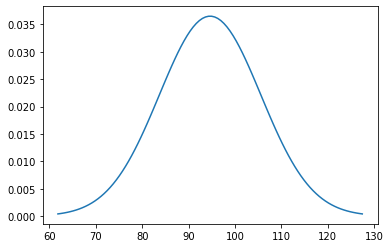

Maxspeed: 50 , Mean,SD= [33.03904686077897, 10.435123083132865]


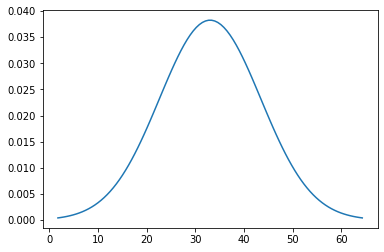

Maxspeed: 70 , Mean,SD= [68.01818822720719, 13.6818692836499]


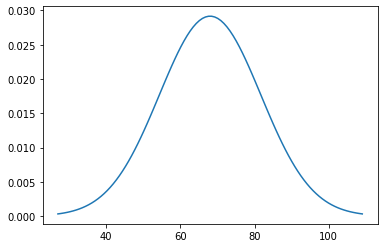

Maxspeed: 40 , Mean,SD= [45.211437180097185, 19.338288102658687]


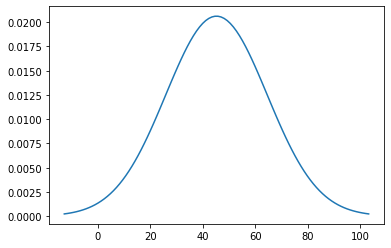

Maxspeed: 90 , Mean,SD= [82.03179719534515, 10.543657308188784]


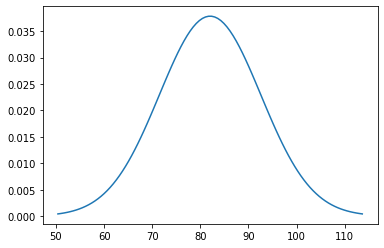

Maxspeed: 80 , Mean,SD= [81.10894122757934, 11.668025911053373]


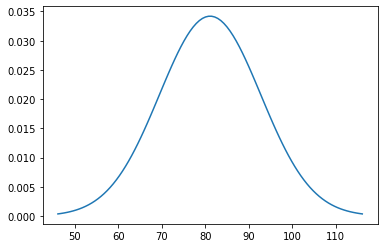

Maxspeed: 120 , Mean,SD= [104.6185746050754, 7.121724207960219]


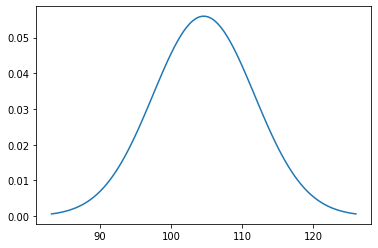

Maxspeed: 60 , Mean,SD= [66.96116844609023, 12.644926625119377]


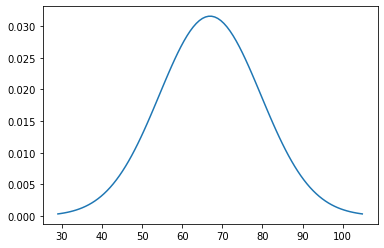

Maxspeed: 20 , Mean,SD= [21.578955135432693, 7.047665802886356]


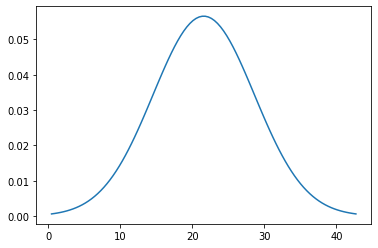

Maxspeed: 30 , Mean,SD= [30.257177089479143, 8.487281041308353]


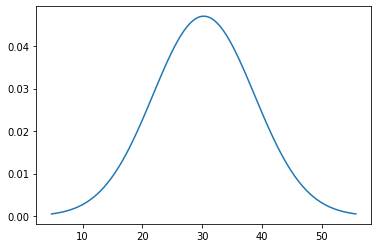

In [84]:
for i in output_dict:
    x = np.linspace(output_dict[i][0] - 3*output_dict[i][1], output_dict[i][0] + 3*output_dict[i][1], 100)
    plt.plot(x, stats.norm.pdf(x, output_dict[i][0], output_dict[i][1]))
    print("Maxspeed:",i,',',"Mean,SD=",output_dict[i])
    plt.show()

In [168]:
sd_df = pd.DataFrame(np.array([[100 , 94.64203798229391, 10.928605249432142], [50 , 33.03904686077897, 10.435123083132865], 
                            [70, 68.01818822720719, 13.6818692836499], [40 , 45.211437180097185, 19.338288102658687],
                            [90, 82.03179719534515, 10.543657308188784], [80, 81.10894122757934, 11.668025911053373],
                            [120 , 104.6185746050754, 7.121724207960219], [60 , 66.96116844609023, 12.644926625119377],
                            [20, 21.578955135432693, 7.047665802886356], [30 , 30.257177089479143, 8.487281041308353]]),
                   columns=['maxspeed', 'meanspeed', 'sd'])
sd_df

maxspeed   meanspeed         sd
0     100.0   94.642038  10.928605
1      50.0   33.039047  10.435123
2      70.0   68.018188  13.681869
3      40.0   45.211437  19.338288
4      90.0   82.031797  10.543657
5      80.0   81.108941  11.668026
6     120.0  104.618575   7.121724
7      60.0   66.961168  12.644927
8      20.0   21.578955   7.047666
9      30.0   30.257177   8.487281

In [169]:
result=fill_df.merge(sd_df, how='left')
result

osmid  speed_mph_mean           u           v  key  oneway  lanes  \
0         3996189      100.748833    23001195   359852835    0    True      3   
1         3996189      100.748833    23001220    23001195    0    True      3   
2         3996189      100.748833    23001944    23001220    0    True      3   
3         3996189      100.748833    23001985    23001944    0    True      3   
4         3996189      100.748833    23002236    23001985    0    True      3   
...           ...             ...         ...         ...  ...     ...    ...   
115985  699181046       40.089789  7549586452   260447590    0   False      1   
115986  699286587       29.414750   201680822  6549083955    0   False      1   
115987  699286587       29.414750  6549083955   201680822    0   False      1   
115988  699385225       27.389875    26066630    26066631    0   False      4   
115989  699385225       27.389875    26066631    26066630    0   False      4   

                                name   highway  maxspeed  ...  junction  \
0                               M-40  motorway       100  ...       NaN   
1                               M-40  motorway       100  ...       NaN   
2                               M-40  motorway       100  ...       NaN   
3                               M-40  motorway       100  ...       NaN   
4                               M-40  motorway       100  ...       NaN   
...                              ...       ...       ...  ...       ...   
115985  Calle Arquitecto López Otero  tertiary        50  ...       NaN   
115986       Avenida de la Osa Mayor  tertiary        50  ...       NaN   
115987       Avenida de la Osa Mayor  tertiary        50  ...       NaN   
115988                      Gran Vía  tertiary        30  ...       NaN   
115989                      Gran Vía  tertiary        30  ...       NaN   

       bridge access tunnel est_width landuse  width  \
0         NaN    NaN    NaN       NaN     NaN    NaN   
1         NaN    NaN    NaN       NaN     NaN    NaN   
2         NaN    NaN    NaN       NaN     NaN    NaN   
3         NaN    NaN    NaN       NaN     NaN    NaN   
4         NaN    NaN    NaN       NaN     NaN    NaN   
...       ...    ...    ...       ...     ...    ...   
115985    NaN    NaN    NaN       NaN     NaN    NaN   
115986    NaN    NaN    NaN       NaN     NaN    NaN   
115987    NaN    NaN    NaN       NaN     NaN    NaN   
115988    NaN    NaN    NaN       NaN     NaN    NaN   
115989    NaN    NaN    NaN       NaN     NaN    NaN   

                                                 geometry  meanspeed  \
0       LINESTRING (-3.7381223 40.3618151, -3.7369952 ...  94.642038   
1       LINESTRING (-3.7395663 40.3618038, -3.7381223 ...  94.642038   
2       LINESTRING (-3.7409568 40.3618431, -3.7395663 ...  94.642038   
3       LINESTRING (-3.7419095 40.3618888, -3.7409568 ...  94.642038   
4       LINESTRING (-3.7429572 40.3619073, -3.7419095 ...  94.642038   
...                                                   ...        ...   
115985  LINESTRING (-3.7307745 40.4431496, -3.7308514 ...  33.039047   
115986  LINESTRING (-3.7791253 40.4595704, -3.7789423 ...  33.039047   
115987  LINESTRING (-3.7789423 40.4596383, -3.7791253 ...  33.039047   
115988  LINESTRING (-3.7068988 40.4208795, -3.707185 4...  30.257177   
115989  LINESTRING (-3.707185 40.4210577, -3.7068988 4...  30.257177   

               sd  
0       10.928605  
1       10.928605  
2       10.928605  
3       10.928605  
4       10.928605  
...           ...  
115985  10.435123  
115986  10.435123  
115987  10.435123  
115988   8.487281  
115989   8.487281  

[115990 rows x 22 columns]

In [170]:
result['z-score'] = (result['speed_mph_mean']-result['meanspeed'])/result['sd']
result

osmid  speed_mph_mean           u           v  key  oneway  lanes  \
0         3996189      100.748833    23001195   359852835    0    True      3   
1         3996189      100.748833    23001220    23001195    0    True      3   
2         3996189      100.748833    23001944    23001220    0    True      3   
3         3996189      100.748833    23001985    23001944    0    True      3   
4         3996189      100.748833    23002236    23001985    0    True      3   
...           ...             ...         ...         ...  ...     ...    ...   
115985  699181046       40.089789  7549586452   260447590    0   False      1   
115986  699286587       29.414750   201680822  6549083955    0   False      1   
115987  699286587       29.414750  6549083955   201680822    0   False      1   
115988  699385225       27.389875    26066630    26066631    0   False      4   
115989  699385225       27.389875    26066631    26066630    0   False      4   

                                name   highway  maxspeed  ...  bridge access  \
0                               M-40  motorway       100  ...     NaN    NaN   
1                               M-40  motorway       100  ...     NaN    NaN   
2                               M-40  motorway       100  ...     NaN    NaN   
3                               M-40  motorway       100  ...     NaN    NaN   
4                               M-40  motorway       100  ...     NaN    NaN   
...                              ...       ...       ...  ...     ...    ...   
115985  Calle Arquitecto López Otero  tertiary        50  ...     NaN    NaN   
115986       Avenida de la Osa Mayor  tertiary        50  ...     NaN    NaN   
115987       Avenida de la Osa Mayor  tertiary        50  ...     NaN    NaN   
115988                      Gran Vía  tertiary        30  ...     NaN    NaN   
115989                      Gran Vía  tertiary        30  ...     NaN    NaN   

       tunnel est_width landuse width  \
0         NaN       NaN     NaN   NaN   
1         NaN       NaN     NaN   NaN   
2         NaN       NaN     NaN   NaN   
3         NaN       NaN     NaN   NaN   
4         NaN       NaN     NaN   NaN   
...       ...       ...     ...   ...   
115985    NaN       NaN     NaN   NaN   
115986    NaN       NaN     NaN   NaN   
115987    NaN       NaN     NaN   NaN   
115988    NaN       NaN     NaN   NaN   
115989    NaN       NaN     NaN   NaN   

                                                 geometry  meanspeed  \
0       LINESTRING (-3.7381223 40.3618151, -3.7369952 ...  94.642038   
1       LINESTRING (-3.7395663 40.3618038, -3.7381223 ...  94.642038   
2       LINESTRING (-3.7409568 40.3618431, -3.7395663 ...  94.642038   
3       LINESTRING (-3.7419095 40.3618888, -3.7409568 ...  94.642038   
4       LINESTRING (-3.7429572 40.3619073, -3.7419095 ...  94.642038   
...                                                   ...        ...   
115985  LINESTRING (-3.7307745 40.4431496, -3.7308514 ...  33.039047   
115986  LINESTRING (-3.7791253 40.4595704, -3.7789423 ...  33.039047   
115987  LINESTRING (-3.7789423 40.4596383, -3.7791253 ...  33.039047   
115988  LINESTRING (-3.7068988 40.4208795, -3.707185 4...  30.257177   
115989  LINESTRING (-3.707185 40.4210577, -3.7068988 4...  30.257177   

               sd   z-score  
0       10.928605  0.558790  
1       10.928605  0.558790  
2       10.928605  0.558790  
3       10.928605  0.558790  
4       10.928605  0.558790  
...           ...       ...  
115985  10.435123  0.675674  
115986  10.435123 -0.347317  
115987  10.435123 -0.347317  
115988   8.487281 -0.337835  
115989   8.487281 -0.337835  

[115990 rows x 23 columns]

In [111]:
def sum_l(L):
    sum = 0
    for i in L:
        sum += i
    return sum
node_dict = {}
u_list = [i for i in fill_df['u']]
v_list = [i for i in fill_df['v']]
lanes_list = [i for i in fill_df['lanes']]
for i in range(len(u_list)):
    node_dict.setdefault(u_list[i],{'in':[], 'out':[]})
    node_dict.setdefault(v_list[i],{'in':[], 'out':[]})
    node_dict[u_list[i]]['out'].append(lanes_list[i])
    node_dict[v_list[i]]['in'].append(lanes_list[i])
for i in node_dict:
    if len(node_dict[i]['out']) == 0 or len(node_dict[i]['in']) == 0:
        df = df.append({'v': i,'lanes_df':0}, ignore_index=True)
    else:
        sum(node_dict[i]['out']) - sum(node_dict[i]['in'])
        df = df.append({'v': i,'lanes_df':sum(node_dict[i]['out']) - sum(node_dict[i]['in'])}, ignore_index=True)
        #print(len(node_dict))
df

v lanes_df
0        23001195        0
1       359852835        0
2        23001220        0
3        23001944        0
4        23001985        0
...           ...      ...
91797    32014722        0
91798  7549586452        0
91799   260447591        0
91800   260447592        0
91801  3720035894        0

[91802 rows x 2 columns]

In [105]:
node_dict

{23001195: {'in': [3], 'out': [3]},
 359852835: {'in': [3], 'out': []},
 23001220: {'in': [3], 'out': [3]},
 23001944: {'in': [3], 'out': [3]},
 23001985: {'in': [3], 'out': [3]},
 23002236: {'in': [3], 'out': [3]},
 23002322: {'in': [3], 'out': [3]},
 20952892: {'in': [3], 'out': [3]},
 4920159639: {'in': [3], 'out': [3]},
 21364527: {'in': [3], 'out': [3]},
 20952893: {'in': [3], 'out': [3, 1]},
 20952888: {'in': [2], 'out': [2, 1]},
 4570051419: {'in': [2, 3], 'out': [3]},
 20952909: {'in': [2], 'out': [2]},
 2536930762: {'in': [2], 'out': [2]},
 21364526: {'in': [3], 'out': [2, 3]},
 4344504213: {'in': [2], 'out': [2]},
 2536930732: {'in': [2], 'out': [2]},
 4344504214: {'in': [2], 'out': [2]},
 20952914: {'in': [3], 'out': [3, 3]},
 2424952617: {'in': [3, 3], 'out': [3, 3, 3]},
 20952931: {'in': [1, 2], 'out': [1]},
 20952934: {'in': [1], 'out': [1]},
 1046902624: {'in': [1], 'out': []},
 20952942: {'in': [3, 3, 3], 'out': [1, 3]},
 20952947: {'in': [1], 'out': [1]},
 5205117156: 

In [143]:
fill_df

osmid  speed_mph_mean           u           v  key  oneway  lanes  \
0         3996189      100.748833    23001195   359852835    0    True      3   
1         3996189      100.748833    23001220    23001195    0    True      3   
2         3996189      100.748833    23001944    23001220    0    True      3   
3         3996189      100.748833    23001985    23001944    0    True      3   
4         3996189      100.748833    23002236    23001985    0    True      3   
...           ...             ...         ...         ...  ...     ...    ...   
115985  699181046       40.089789  7549586452   260447590    0   False      1   
115986  699286587       29.414750   201680822  6549083955    0   False      1   
115987  699286587       29.414750  6549083955   201680822    0   False      1   
115988  699385225       27.389875    26066630    26066631    0   False      4   
115989  699385225       27.389875    26066631    26066630    0   False      4   

                                name   highway  maxspeed   length   ref  \
0                               M-40  motorway       100   96.057  M-40   
1                               M-40  motorway       100  122.353  M-40   
2                               M-40  motorway       100  117.894  M-40   
3                               M-40  motorway       100   80.879  M-40   
4                               M-40  motorway       100   88.793  M-40   
...                              ...       ...       ...      ...   ...   
115985  Calle Arquitecto López Otero  tertiary        50    7.273   NaN   
115986       Avenida de la Osa Mayor  tertiary        50   17.225   NaN   
115987       Avenida de la Osa Mayor  tertiary        50   17.225   NaN   
115988                      Gran Vía  tertiary        30   31.299   NaN   
115989                      Gran Vía  tertiary        30   31.299   NaN   

       junction bridge access tunnel  est_width  landuse  width  \
0           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
1           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
2           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
3           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
4           NaN    NaN    NaN    NaN        NaN      NaN    NaN   
...         ...    ...    ...    ...        ...      ...    ...   
115985      NaN    NaN    NaN    NaN        NaN      NaN    NaN   
115986      NaN    NaN    NaN    NaN        NaN      NaN    NaN   
115987      NaN    NaN    NaN    NaN        NaN      NaN    NaN   
115988      NaN    NaN    NaN    NaN        NaN      NaN    NaN   
115989      NaN    NaN    NaN    NaN        NaN      NaN    NaN   

                                                 geometry  
0       LINESTRING (-3.7381223 40.3618151, -3.7369952 ...  
1       LINESTRING (-3.7395663 40.3618038, -3.7381223 ...  
2       LINESTRING (-3.7409568 40.3618431, -3.7395663 ...  
3       LINESTRING (-3.7419095 40.3618888, -3.7409568 ...  
4       LINESTRING (-3.7429572 40.3619073, -3.7419095 ...  
...                                                   ...  
115985  LINESTRING (-3.7307745 40.4431496, -3.7308514 ...  
115986  LINESTRING (-3.7791253 40.4595704, -3.7789423 ...  
115987  LINESTRING (-3.7789423 40.4596383, -3.7791253 ...  
115988  LINESTRING (-3.7068988 40.4208795, -3.707185 4...  
115989  LINESTRING (-3.707185 40.4210577, -3.7068988 4...  

[115990 rows x 20 columns]

In [130]:
fill_df.astype({'v': 'int'}).dtypes

osmid               int64
speed_mph_mean    float64
u                   int64
v                   int64
key                 int64
oneway               bool
lanes               int64
name               object
highway            object
maxspeed            int64
length            float64
ref                object
junction           object
bridge             object
access             object
tunnel             object
est_width         float64
landuse           float64
width             float64
geometry           object
dtype: object

In [157]:
group_df.reset_index(level=0, inplace=True)
group_df

v  lanes_df
0          171946         0
1          171948         0
2          171951         0
3          171952        -2
4          171954         1
...           ...       ...
90192  8572999191         0
90193  8572999192         0
90194  8572999193         0
90195  8572999194         0
90196  8572999195         0

[90197 rows x 2 columns]

In [140]:
df.dtypes

v            int64
lanes_df    object
dtype: object

In [158]:
result=fill_df.merge(group_df, how='left')
result

osmid  speed_mph_mean           u           v  key  oneway  lanes  \
0         3996189      100.748833    23001195   359852835    0    True      3   
1         3996189      100.748833    23001220    23001195    0    True      3   
2         3996189      100.748833    23001944    23001220    0    True      3   
3         3996189      100.748833    23001985    23001944    0    True      3   
4         3996189      100.748833    23002236    23001985    0    True      3   
...           ...             ...         ...         ...  ...     ...    ...   
115985  699181046       40.089789  7549586452   260447590    0   False      1   
115986  699286587       29.414750   201680822  6549083955    0   False      1   
115987  699286587       29.414750  6549083955   201680822    0   False      1   
115988  699385225       27.389875    26066630    26066631    0   False      4   
115989  699385225       27.389875    26066631    26066630    0   False      4   

                                name   highway  maxspeed  ...   ref junction  \
0                               M-40  motorway       100  ...  M-40      NaN   
1                               M-40  motorway       100  ...  M-40      NaN   
2                               M-40  motorway       100  ...  M-40      NaN   
3                               M-40  motorway       100  ...  M-40      NaN   
4                               M-40  motorway       100  ...  M-40      NaN   
...                              ...       ...       ...  ...   ...      ...   
115985  Calle Arquitecto López Otero  tertiary        50  ...   NaN      NaN   
115986       Avenida de la Osa Mayor  tertiary        50  ...   NaN      NaN   
115987       Avenida de la Osa Mayor  tertiary        50  ...   NaN      NaN   
115988                      Gran Vía  tertiary        30  ...   NaN      NaN   
115989                      Gran Vía  tertiary        30  ...   NaN      NaN   

       bridge access tunnel est_width  landuse  width  \
0         NaN    NaN    NaN       NaN      NaN    NaN   
1         NaN    NaN    NaN       NaN      NaN    NaN   
2         NaN    NaN    NaN       NaN      NaN    NaN   
3         NaN    NaN    NaN       NaN      NaN    NaN   
4         NaN    NaN    NaN       NaN      NaN    NaN   
...       ...    ...    ...       ...      ...    ...   
115985    NaN    NaN    NaN       NaN      NaN    NaN   
115986    NaN    NaN    NaN       NaN      NaN    NaN   
115987    NaN    NaN    NaN       NaN      NaN    NaN   
115988    NaN    NaN    NaN       NaN      NaN    NaN   
115989    NaN    NaN    NaN       NaN      NaN    NaN   

                                                 geometry lanes_df  
0       LINESTRING (-3.7381223 40.3618151, -3.7369952 ...        0  
1       LINESTRING (-3.7395663 40.3618038, -3.7381223 ...        0  
2       LINESTRING (-3.7409568 40.3618431, -3.7395663 ...        0  
3       LINESTRING (-3.7419095 40.3618888, -3.7409568 ...        0  
4       LINESTRING (-3.7429572 40.3619073, -3.7419095 ...        0  
...                                                   ...      ...  
115985  LINESTRING (-3.7307745 40.4431496, -3.7308514 ...        0  
115986  LINESTRING (-3.7791253 40.4595704, -3.7789423 ...        0  
115987  LINESTRING (-3.7789423 40.4596383, -3.7791253 ...        0  
115988  LINESTRING (-3.7068988 40.4208795, -3.707185 4...        0  
115989  LINESTRING (-3.707185 40.4210577, -3.7068988 4...        0  

[115990 rows x 21 columns]

In [178]:
result['congestion'] = 0
result

osmid  speed_mph_mean           u           v  key  oneway  lanes  \
0         3996189      100.748833    23001195   359852835    0    True      3   
1         3996189      100.748833    23001220    23001195    0    True      3   
2         3996189      100.748833    23001944    23001220    0    True      3   
3         3996189      100.748833    23001985    23001944    0    True      3   
4         3996189      100.748833    23002236    23001985    0    True      3   
...           ...             ...         ...         ...  ...     ...    ...   
115985  699181046       40.089789  7549586452   260447590    0   False      1   
115986  699286587       29.414750   201680822  6549083955    0   False      1   
115987  699286587       29.414750  6549083955   201680822    0   False      1   
115988  699385225       27.389875    26066630    26066631    0   False      4   
115989  699385225       27.389875    26066631    26066630    0   False      4   

                                name   highway  maxspeed  ...  access tunnel  \
0                               M-40  motorway       100  ...     NaN    NaN   
1                               M-40  motorway       100  ...     NaN    NaN   
2                               M-40  motorway       100  ...     NaN    NaN   
3                               M-40  motorway       100  ...     NaN    NaN   
4                               M-40  motorway       100  ...     NaN    NaN   
...                              ...       ...       ...  ...     ...    ...   
115985  Calle Arquitecto López Otero  tertiary        50  ...     NaN    NaN   
115986       Avenida de la Osa Mayor  tertiary        50  ...     NaN    NaN   
115987       Avenida de la Osa Mayor  tertiary        50  ...     NaN    NaN   
115988                      Gran Vía  tertiary        30  ...     NaN    NaN   
115989                      Gran Vía  tertiary        30  ...     NaN    NaN   

       est_width landuse width  \
0            NaN     NaN   NaN   
1            NaN     NaN   NaN   
2            NaN     NaN   NaN   
3            NaN     NaN   NaN   
4            NaN     NaN   NaN   
...          ...     ...   ...   
115985       NaN     NaN   NaN   
115986       NaN     NaN   NaN   
115987       NaN     NaN   NaN   
115988       NaN     NaN   NaN   
115989       NaN     NaN   NaN   

                                                 geometry  meanspeed  \
0       LINESTRING (-3.7381223 40.3618151, -3.7369952 ...  94.642038   
1       LINESTRING (-3.7395663 40.3618038, -3.7381223 ...  94.642038   
2       LINESTRING (-3.7409568 40.3618431, -3.7395663 ...  94.642038   
3       LINESTRING (-3.7419095 40.3618888, -3.7409568 ...  94.642038   
4       LINESTRING (-3.7429572 40.3619073, -3.7419095 ...  94.642038   
...                                                   ...        ...   
115985  LINESTRING (-3.7307745 40.4431496, -3.7308514 ...  33.039047   
115986  LINESTRING (-3.7791253 40.4595704, -3.7789423 ...  33.039047   
115987  LINESTRING (-3.7789423 40.4596383, -3.7791253 ...  33.039047   
115988  LINESTRING (-3.7068988 40.4208795, -3.707185 4...  30.257177   
115989  LINESTRING (-3.707185 40.4210577, -3.7068988 4...  30.257177   

               sd   z-score congestion  
0       10.928605  0.558790          0  
1       10.928605  0.558790          0  
2       10.928605  0.558790          0  
3       10.928605  0.558790          0  
4       10.928605  0.558790          0  
...           ...       ...        ...  
115985  10.435123  0.675674          0  
115986  10.435123 -0.347317          0  
115987  10.435123 -0.347317          0  
115988   8.487281 -0.337835          0  
115989   8.487281 -0.337835          0  

[115990 rows x 24 columns]

In [189]:
for index,row in result.iterrows():
    if row['z-score']<=-1:
        result.at[index,'congestion']=1

In [190]:
result.to_csv('final_df',index=False)

In [182]:
#result.isnull().sum()
result.dtypes

osmid               int64
speed_mph_mean    float64
u                   int64
v                   int64
key                 int64
oneway               bool
lanes               int64
name               object
highway            object
maxspeed            int64
length            float64
ref                object
junction           object
bridge             object
access             object
tunnel             object
est_width         float64
landuse           float64
width             float64
geometry           object
meanspeed         float64
sd                float64
z-score           float64
congestion          int64
dtype: object

In [191]:
temp_df = result['congestion']
temp_df

0         0
1         0
2         0
3         0
4         0
         ..
115985    0
115986    0
115987    0
115988    0
115989    0
Name: congestion, Length: 115990, dtype: int64

In [153]:
group_df=df.groupby(['v']).max()
group_df

lanes_df
v                   
171946             0
171948             0
171951             0
171952            -2
171954             1
...              ...
8572999191         0
8572999192         0
8572999193         0
8572999194         0
8572999195         0

[90197 rows x 1 columns]

In [192]:
arr=np.array(temp_df,dtype='int')
arr

array([0, 0, 0, ..., 0, 0, 0])

In [193]:
print(arr.dtype)

int64


In [194]:
np.save('congestion.npy',arr)

In [195]:
temparr=np.load('congestion.npy')
temparr

array([0, 0, 0, ..., 0, 0, 0])